In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['price'] = data.target  # Target variable (house price in $100,000s)

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nDataset statistics:")
print(df.describe())

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Missing values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

Dataset statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.63


Correlation with price:
Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
price         1.000000
Name: price, dtype: float64


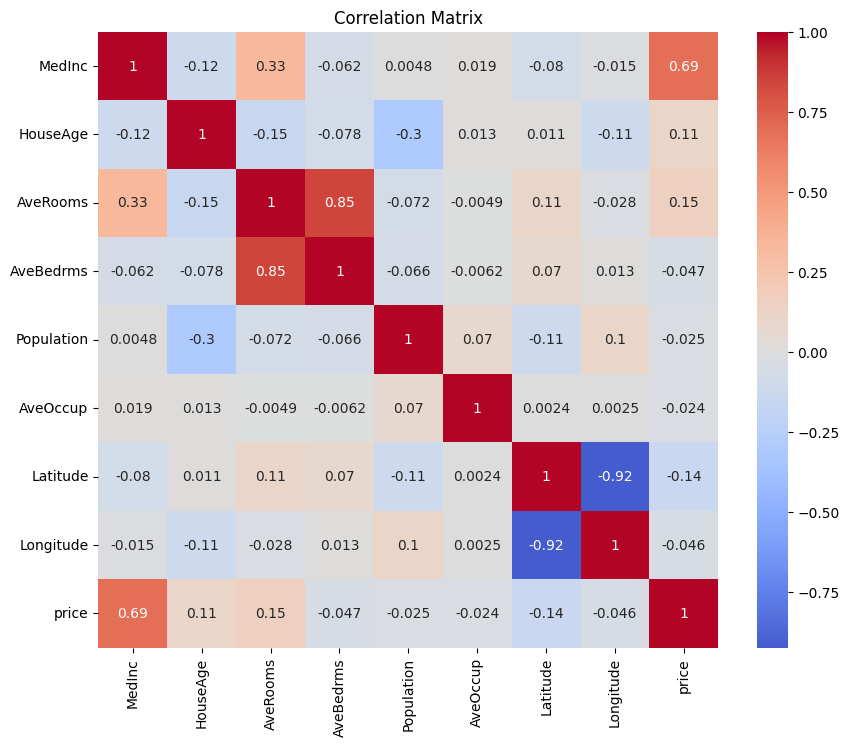


First 5 rows of scaled features:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.476300  0.982143  1.243257  -0.327872   -1.111111 -0.489445  1.060213   
1  2.463130 -0.607019  0.682365  -0.652318    1.024586 -1.096078  1.050799   
2  1.885410  1.856182  2.223710  -0.017747   -0.932366 -0.153671  1.046093   
3  0.992102  1.856182  0.365986  -0.020165   -0.868675 -0.499803  1.046093   
4 -0.002252  1.856182  0.715234   0.029954   -0.861484 -0.998594  1.046093   

   Longitude  
0  -1.333078  
1  -1.328054  
2  -1.338101  
3  -1.343125  
4  -1.343125  


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Check correlations
print("\nCorrelation with price:")
print(df.corr()['price'].sort_values())

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

# Handle outliers (example: cap extreme values at 99th percentile)
for col in df.columns:
    if col != 'price':
        df[col] = df[col].clip(upper=df[col].quantile(0.99))

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFirst 5 rows of scaled features:")
print(X_scaled.head())

In [3]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 16512 samples
Testing set size: 4128 samples


In [4]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:
MedInc: 0.8780
HouseAge: 0.1562
AveRooms: -0.1945
AveBedrms: 0.1843
Population: 0.0484
AveOccup: -0.2579
Latitude: -0.8779
Longitude: -0.8119
Intercept: 2.0668



Model Performance:
Training MSE: 0.4308
Testing MSE: 0.4514
Training R²: 0.6777
Testing R²: 0.6555


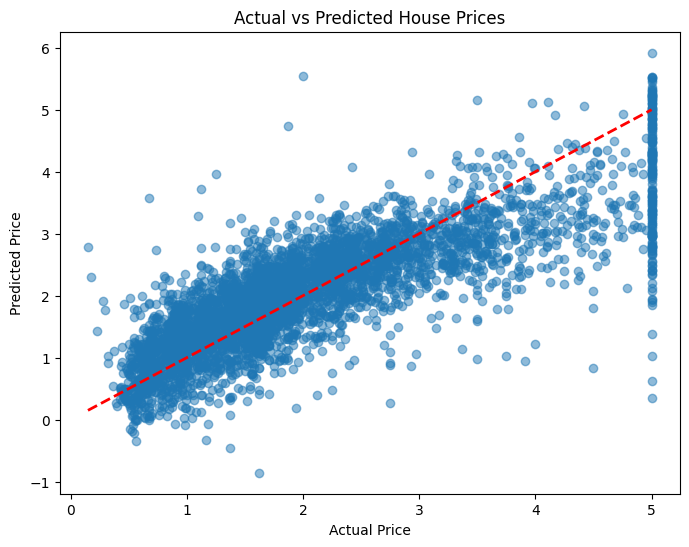

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Performance:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [9]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data (same as before)
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())
df['price'] = data.target  # Price in $100,000s

# Preprocessing
X = df.drop('price', axis=1)
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Keep as DataFrame

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for a new house with realistic values
new_house = pd.DataFrame([[8.0, 20, 6.0, 1.0, 1000, 3.0, 34.0, -118.0]], 
                         columns=X.columns)  # Realistic lat/long for California
new_house_scaled = pd.DataFrame(scaler.transform(new_house), columns=X.columns)  # Keep column names
predicted_price = model.predict(new_house_scaled)

print(f"\nPredicted price for new house: ${predicted_price[0] * 100000:.2f}")

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Predicted price for new house: $369581.01
